In [ ]:
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/drive/MyDrive/kivaData_augmented.csv')
df.head()

<ipython-input-30-623336e57726>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/kivaData_augmented.csv')


,region,country,latitude,longitude,id,funded_amount,loan_amount,activity,sector,use,country_code,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,location_type,latlngImputed,useforspatial,popDensity,precipitation,TimeToCity,AvgNightLight,LandClassification,Elevation,Temperature,Evaporation,Modis_LAI,Modis_EVI,soil_orgc,soil_phaq,soil_clay,soil_silt,soil_sand,Conflicts_total,Conflicts_totalDeaths,Conflicts_totalDeathsCivilians
0,NaN,Albania,41.160242,20.177926,656175,975.0,975.0,Grocery Store,Food,To stock up on inventory items for her grocery...,AL,ALL,239.0,2014-01-10 14:30:59+00:00,2014-01-09 08:00:00+00:00,2014-01-13 22:13:29+00:00,20,31,"#Woman Owned Biz, #Repeat Borrower, #Parent",female,monthly,2014-01-10,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,NaN,Albania,41.160242,20.177926,656708,1950.0,1950.0,Used Clothing,Clothing,To buy used clothes to resell,AL,ALL,239.0,2014-01-13 14:03:50+00:00,2014-01-10 08:00:00+00:00,2014-01-20 13:09:16+00:00,26,70,"#Repeat Borrower, #Parent, #Eco-friendly, user...",male,monthly,2014-01-13,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,NaN,Albania,41.160242,20.177926,658089,975.0,975.0,Personal Housing Expenses,Housing,to repair his family home.,AL,ALL,239.0,2014-01-16 14:36:58+00:00,2014-01-15 08:00:00+00:00,2014-01-19 14:57:58+00:00,20,39,"user_favorite, user_favorite, #Elderly, #Suppo...",male,monthly,2014-01-16,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,NaN,Albania,41.160242,20.177926,657977,975.0,975.0,Higher education costs,Education,To pay her son's last college tuition fees.,AL,ALL,239.0,2014-01-16 10:14:15+00:00,2014-01-15 08:00:00+00:00,2014-01-17 13:46:12+00:00,14,37,"#Schooling, #Fabrics, #Repeat Borrower",female,monthly,2014-01-16,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,NaN,Albania,41.160242,20.177926,658562,1475.0,1475.0,Personal Housing Expenses,Housing,to finish the roofing of one room,AL,ALL,239.0,2014-01-17 11:01:22+00:00,2014-01-16 08:00:00+00:00,2014-01-29 18:11:43+00:00,20,49,NaN,female,monthly,2014-01-17,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   region                          614405 non-null  object 
 1   country                         671205 non-null  object 
 2   latitude                        651481 non-null  float64
 3   longitude                       651481 non-null  float64
 4   id                              671205 non-null  int64  
 5   funded_amount                   671205 non-null  float64
 6   loan_amount                     671205 non-null  float64
 7   activity                        671205 non-null  object 
 8   sector                          671205 non-null  object 
 9   use                             666972 non-null  object 
 10  country_code                    671197 non-null  object 
 11  currency                        671205 non-null  object 
 12  partner_id      

In [ ]:
missing = df.isnull().sum()/len(df) * 100
missing

region                             8.462392
country                            0.000000
latitude                           2.938596
longitude                          2.938596
id                                 0.000000
funded_amount                      0.000000
loan_amount                        0.000000
activity                           0.000000
sector                             0.000000
use                                0.630657
country_code                       0.001192
currency                           0.000000
partner_id                         2.012351
posted_time                        0.000000
disbursed_time                     0.356970
funded_time                        7.200632
term_in_months                     0.000000
lender_count                       0.000000
tags                              25.538546
borrower_genders                   0.628869
repayment_interval                 0.000000
date                               0.000000
location_type                   

In [ ]:
df.describe()

,latitude,longitude,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,latlngImputed,useforspatial,popDensity,precipitation,TimeToCity,AvgNightLight,LandClassification,Elevation,Temperature,Evaporation,Modis_LAI,Modis_EVI,soil_orgc,soil_phaq,soil_clay,soil_silt,soil_sand,Conflicts_total,Conflicts_totalDeaths,Conflicts_totalDeathsCivilians
count,651481.000000,651481.000000,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000,671205.000000,671205.000000,651481.000000,651481.000000,637434.000000,496946.000000,651481.000000,651481.000000,636319.000000,478655.000000,478656.000000,641550.000000,123846.000000,126002.000000,126186.000000,126186.000000,126021.000000,651481.000000,651481.000000,651481.000000
mean,10.213186,34.261766,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922,0.070297,0.888237,1208.843228,1268.215212,125.717721,24.459452,77.834476,571.807964,28.120392,9640.884928,15.142363,3234.463083,13.344927,6.418235,33.316123,29.146995,37.480523,3.305877,24.512552,9.005110
std,14.548519,79.154881,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551,0.255648,0.315075,2498.722979,658.706894,367.380779,22.200996,72.176235,929.954513,4.303356,3836.676180,12.245440,1315.810109,15.789442,1.122125,17.425998,16.172291,20.711925,21.095179,128.716492,46.898264
min,-42.480140,-172.790661,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,11.000000,-4913.000000,-2.000000,144.000000,1.000000,-502.000000,0.166667,3.300000,0.530000,0.730000,0.102778,0.000000,0.000000,0.000000
25%,0.594895,-56.449592,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000,0.000000,1.000000,152.191666,714.500000,7.000000,5.000000,20.000000,32.000000,26.000000,7066.000000,7.000000,2197.000000,6.175000,5.637500,18.866667,16.937500,21.021111,0.000000,0.000000,0.000000
50%,10.510464,37.654627,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000,0.000000,1.000000,370.281677,1293.500000,55.000000,14.000000,30.000000,206.000000,28.000000,9804.000000,10.000000,3210.000000,8.185714,6.050000,30.166667,24.000000,36.421769,0.000000,0.000000,0.000000
75%,14.039116,113.918229,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000,0.000000,1.000000,974.775024,1779.000000,135.000000,47.000000,140.000000,973.000000,31.000000,12475.000000,18.000000,4239.000000,16.800000,7.514286,42.430000,41.233333,56.000000,0.000000,0.000000,0.000000
max,64.200841,169.260805,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000,1.000000,1.000000,40373.097656,4450.000000,4312.000000,63.000000,220.000000,4383.000000,43.000000,19651.000000,60.000000,6648.000000,321.060000,10.500000,90.500000,83.160000,98.740000,1256.000000,8336.000000,2150.000000


In [ ]:
cols=missing[missing > 50].index
cols

Index(['soil_orgc', 'soil_phaq', 'soil_clay', 'soil_silt', 'soil_sand'], dtype='object')

In [ ]:
df.drop(cols,axis=1,inplace=True)

In [ ]:
df.country.unique()

array(['Albania', 'Armenia', 'Azerbaijan', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Georgia', 'Ghana',
       'Guam', 'Guatemala', 'Haiti', 'Honduras', 'India', 'Indonesia',
       'Iraq', 'Israel', 'Jordan', 'Kenya', 'Kosovo', 'Kyrgyzstan',
       'Lebanon', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mexico',
       'Moldova', 'Mongolia', 'Mozambique', 'Myanmar (Burma)',
       'Nicaragua', 'Nigeria', 'Pakistan', 'Palestine', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Puerto Rico', 'Rwanda',
       'Samoa', 'Senegal', 'Sierra Leone', 'South Africa', 'South Sudan',
       'Suriname', 'Tajikistan', 'Tanzania',
       'The Democratic Republic of the Congo', 'Timor-Leste', 'Togo',
       'Turkey', 'Uganda', 'United States', 'Vietnam', 'Virgin Islands',
       'Yemen', 'Zambia', 'Zimbabwe', 'Nepal', 'Ukraine

In [ ]:
from scipy import stats

# Check for missing values in the "H" attribute
missing = df['region'].isna()

# Prepare the data for Little's MCAR test
observed = np.array([sum(~missing), sum(missing)])
expected = np.array([len(df) * (1 - np.mean(missing)), len(df) * np.mean(missing)])

# Conduct the test and calculate the p-value
chi2, p_value = stats.chisquare(observed, f_exp=expected)
print(p_value)
# Interpret the results
if p_value < 0.05:
    print("The missing data mechanism for 'region' is not MCAR.")
else:
    print("The missing data mechanism for 'region' is MCAR.")

1.0
The missing data mechanism for 'region' is MCAR.


In [ ]:
df=df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'f' else x)

In [ ]:
df=df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype.kind in 'O' else x)

In [ ]:
df.isnull().sum()

region                            0
country                           0
latitude                          0
longitude                         0
id                                0
funded_amount                     0
loan_amount                       0
activity                          0
sector                            0
use                               0
country_code                      0
currency                          0
partner_id                        0
posted_time                       0
disbursed_time                    0
funded_time                       0
term_in_months                    0
lender_count                      0
tags                              0
borrower_genders                  0
repayment_interval                0
date                              0
location_type                     0
latlngImputed                     0
useforspatial                     0
popDensity                        0
precipitation                     0
TimeToCity                  

In [ ]:
drop_cols=['funded_time','disbursed_time','date','posted_time','partner_id','id','tags']
df.drop(drop_cols,axis=1,inplace=True)

In [ ]:
df.columns

Index(['region', 'country', 'latitude', 'longitude', 'funded_amount',
       'loan_amount', 'activity', 'sector', 'use', 'country_code', 'currency',
       'term_in_months', 'lender_count', 'borrower_genders',
       'repayment_interval', 'location_type', 'latlngImputed', 'useforspatial',
       'popDensity', 'precipitation', 'TimeToCity', 'AvgNightLight',
       'LandClassification', 'Elevation', 'Temperature', 'Evaporation',
       'Modis_LAI', 'Modis_EVI', 'Conflicts_total', 'Conflicts_totalDeaths',
       'Conflicts_totalDeathsCivilians'],
      dtype='object')

In [ ]:
df

,region,country,latitude,longitude,funded_amount,loan_amount,activity,sector,use,country_code,currency,term_in_months,lender_count,borrower_genders,repayment_interval,location_type,latlngImputed,useforspatial,popDensity,precipitation,TimeToCity,AvgNightLight,LandClassification,Elevation,Temperature,Evaporation,Modis_LAI,Modis_EVI,Conflicts_total,Conflicts_totalDeaths,Conflicts_totalDeathsCivilians
0,Kaduna,Albania,41.160242,20.177926,975.0,975.0,Grocery Store,Food,To stock up on inventory items for her grocery...,AL,ALL,20,31,female,monthly,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.000000,8.000000,3341.0,0.0,0.0,0.0
1,Kaduna,Albania,41.160242,20.177926,1950.0,1950.0,Used Clothing,Clothing,To buy used clothes to resell,AL,ALL,26,70,male,monthly,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.000000,8.000000,3341.0,0.0,0.0,0.0
2,Kaduna,Albania,41.160242,20.177926,975.0,975.0,Personal Housing Expenses,Housing,to repair his family home.,AL,ALL,20,39,male,monthly,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.000000,8.000000,3341.0,0.0,0.0,0.0
3,Kaduna,Albania,41.160242,20.177926,975.0,975.0,Higher education costs,Education,To pay her son's last college tuition fees.,AL,ALL,14,37,female,monthly,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.000000,8.000000,3341.0,0.0,0.0,0.0
4,Kaduna,Albania,41.160242,20.177926,1475.0,1475.0,Personal Housing Expenses,Housing,to finish the roofing of one room,AL,ALL,20,49,female,monthly,APPROXIMATE,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.000000,8.000000,3341.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1575.0,1575.0,Farm Supplies,Agriculture,to purchase a cultivator to raise her producti...,VN,VND,17,56,"female, female, female",monthly,APPROXIMATE,0,1,889.668335,1474.5,7.0,7.0,20.0,5.0,28.0,7376.000000,12.000000,2976.0,0.0,0.0,0.0
671201,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1800.0,1800.0,Quarrying,Construction,to purchase supplies to maintain her quarrying...,VN,VND,17,72,"female, female, female",monthly,APPROXIMATE,0,1,889.668335,1474.5,7.0,7.0,20.0,5.0,28.0,7376.000000,12.000000,2976.0,0.0,0.0,0.0
671202,Đông Văn - Đông Sơn,Vietnam,19.782350,105.726315,1550.0,1550.0,Grocery Store,Food,"to purchase more cake, sweet, sugar and milk t...",VN,VND,17,36,"female, female, female",monthly,APPROXIMATE,0,1,889.668335,1474.5,7.0,7.0,20.0,5.0,28.0,7376.000000,12.000000,2976.0,0.0,0.0,0.0
671203,İZMİT,Turkey,40.765441,29.940809,300.0,300.0,Child Care,Services,to buy bunk beds.,TR,TRY,8,7,female,irregular,APPROXIMATE,0,1,312.833344,481.0,32.0,56.0,110.0,5.0,20.0,9640.884928,15.142363,1162.0,0.0,0.0,0.0


In [ ]:
df.duplicated(subset=['funded_amount','loan_amount'])

0         False
1         False
2          True
3          True
4         False
          ...  
671200     True
671201     True
671202     True
671203     True
671204     True
Length: 671205, dtype: bool

In [ ]:
print(len(df))
len(np.where((df['funded_amount'] != df['loan_amount']))[0])

671205


48330

In [ ]:
df.drop('loan_amount',axis=1,inplace=True)

<Axes: >

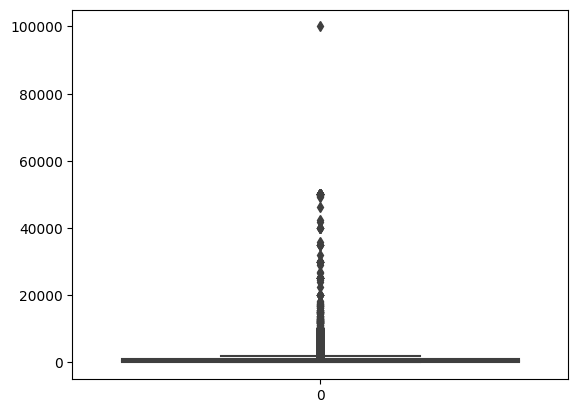

In [ ]:
sn.boxplot(df['funded_amount'])

<Axes: >

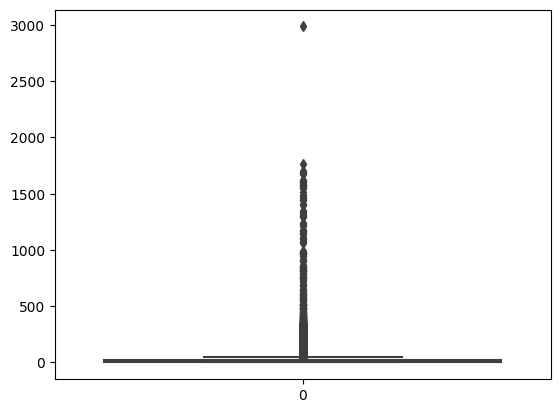

In [ ]:
sn.boxplot(df['lender_count'])

<ipython-input-21-a128d5ff8b9a>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


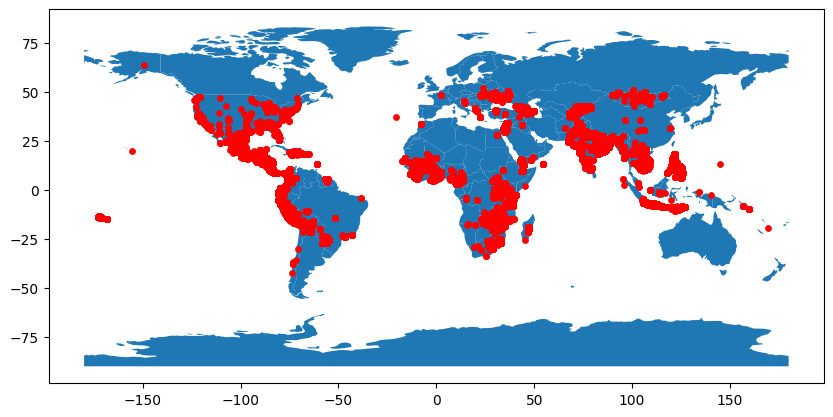

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

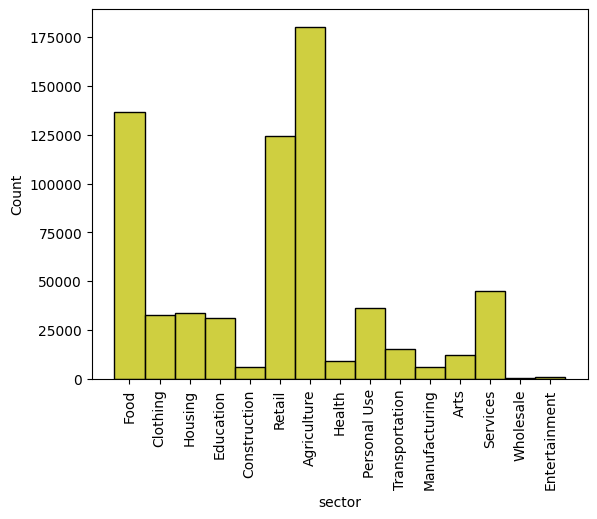

In [ ]:
sn.histplot(df['sector'],color='y')
plt.xticks(rotation=90);

In [ ]:
grouped=df.groupby('country')['Conflicts_totalDeaths'].sum().reset_index().sort_values(by='Conflicts_totalDeaths',ascending=False)[:10]
grouped

,country,Conflicts_totalDeaths
55,Palestine,4.987775e+06
54,Pakistan,3.640292e+06
53,Nigeria,2.810640e+06
84,Yemen,1.082017e+06
34,Kenya,7.815169e+05
74,The Democratic Republic of the Congo,7.638936e+05
45,Mexico,7.045160e+05
78,Uganda,3.238361e+05
59,Philippines,2.578463e+05
38,Lebanon,2.483144e+05


<Axes: xlabel='Temperature', ylabel='Evaporation'>

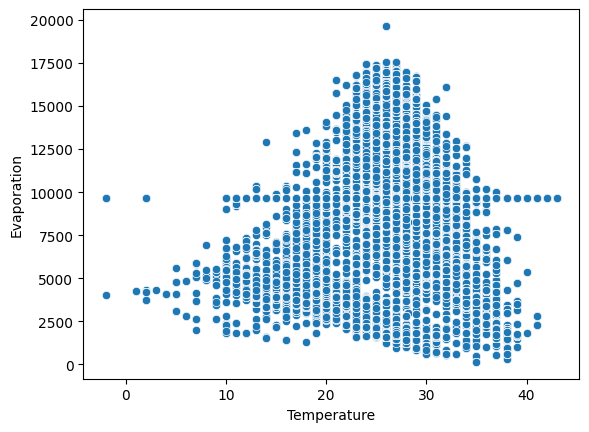

In [ ]:
sn.scatterplot(x='Temperature',y='Evaporation',data=df)

In [ ]:
df['borrower_genders'].unique()

array(['female', 'male',
       'female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female',
       ...,
       'male, male, female, female, female, female, female, female, female, female, female, female, male, female, female, female',
       'female, female, female, female, female, female, female, female, female, female, male, female, female, male, female, female, female',
       'female, male, male, male, male, male, female, female, female, male, male'],
      dtype=object)

In [ ]:
df.drop('borrower_genders',axis=1,inplace=True)
df.drop('use',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df= df.apply(lambda x : label_encoder.fit_transform(x) if x.dtype.kind=='O' else x)

df.head()

,region,country,latitude,longitude,id,funded_amount,loan_amount,activity,sector,use,country_code,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,location_type,latlngImputed,useforspatial,popDensity,precipitation,TimeToCity,AvgNightLight,LandClassification,Elevation,Temperature,Evaporation,Modis_LAI,Modis_EVI,Conflicts_total,Conflicts_totalDeaths,Conflicts_totalDeathsCivilians
0,4837,1,41.160242,20.177926,656175,975.0,975.0,74,6,34294,1,0,239.0,3124,38,1535,20,31,57910,0,2,9,0,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,0.0,0.0,0.0
1,4837,1,41.160242,20.177926,656708,1950.0,1950.0,151,2,21732,1,0,239.0,3667,39,3599,26,70,40819,6904,2,12,0,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,0.0,0.0,0.0
2,4837,1,41.160242,20.177926,658089,975.0,975.0,112,8,410179,1,0,239.0,5064,44,3313,20,39,72538,6904,2,15,0,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,0.0,0.0,0.0
3,4837,1,41.160242,20.177926,657977,975.0,975.0,77,4,26633,1,0,239.0,4950,44,2232,14,37,44790,0,2,15,0,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,0.0,0.0,0.0
4,4837,1,41.160242,20.177926,658562,1475.0,1475.0,112,8,282749,1,0,239.0,5541,45,6213,20,49,59997,0,2,16,0,1,0,179.833328,782.0,12.0,3.0,20.0,300.0,22.0,4651.0,8.0,3341.0,0.0,0.0,0.0


In [ ]:
x=df.drop('funded_amount',axis=1)
y=df['funded_amount']

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(x, 0.7)

{'Conflicts_totalDeaths',
 'Conflicts_totalDeathsCivilians',
 'Modis_LAI',
 'country_code',
 'currency',
 'useforspatial'}

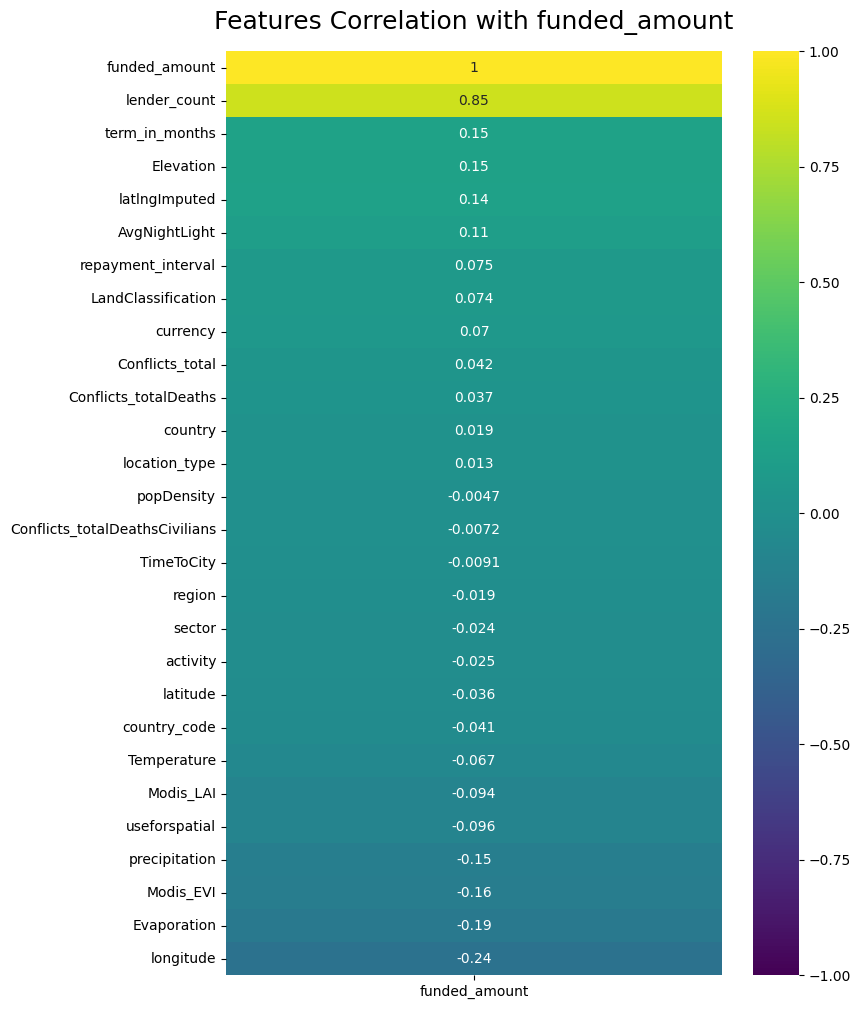

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(df.corr()[['funded_amount']].sort_values(by='funded_amount', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlation with funded_amount', fontdict={'fontsize':18}, pad=16);

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(x, y)
mutual_info

array([0.74514037, 0.57345605, 0.83382444, 0.84010094, 0.16086216,
       0.070203  , 0.57311811, 0.50621269, 0.24601946, 1.23831957,
       0.07393755, 0.00644055, 0.02041093, 0.01543092, 0.78168785,
       0.74716592, 0.33094026, 0.17563795, 0.12953889, 0.57057169,
       0.13177594, 0.56192249, 0.13961388, 0.72366195, 0.08976779,
       0.11204824, 0.08655496])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

lender_count                      1.238320
longitude                         0.840101
latitude                          0.833824
popDensity                        0.781688
precipitation                     0.747166
region                            0.745140
Modis_EVI                         0.723662
country                           0.573456
country_code                      0.573118
Elevation                         0.570572
Evaporation                       0.561922
currency                          0.506213
TimeToCity                        0.330940
term_in_months                    0.246019
AvgNightLight                     0.175638
activity                          0.160862
Modis_LAI                         0.139614
Temperature                       0.131776
LandClassification                0.129539
Conflicts_totalDeaths             0.112048
Conflicts_total                   0.089768
Conflicts_totalDeathsCivilians    0.086555
repayment_interval                0.073938
sector     

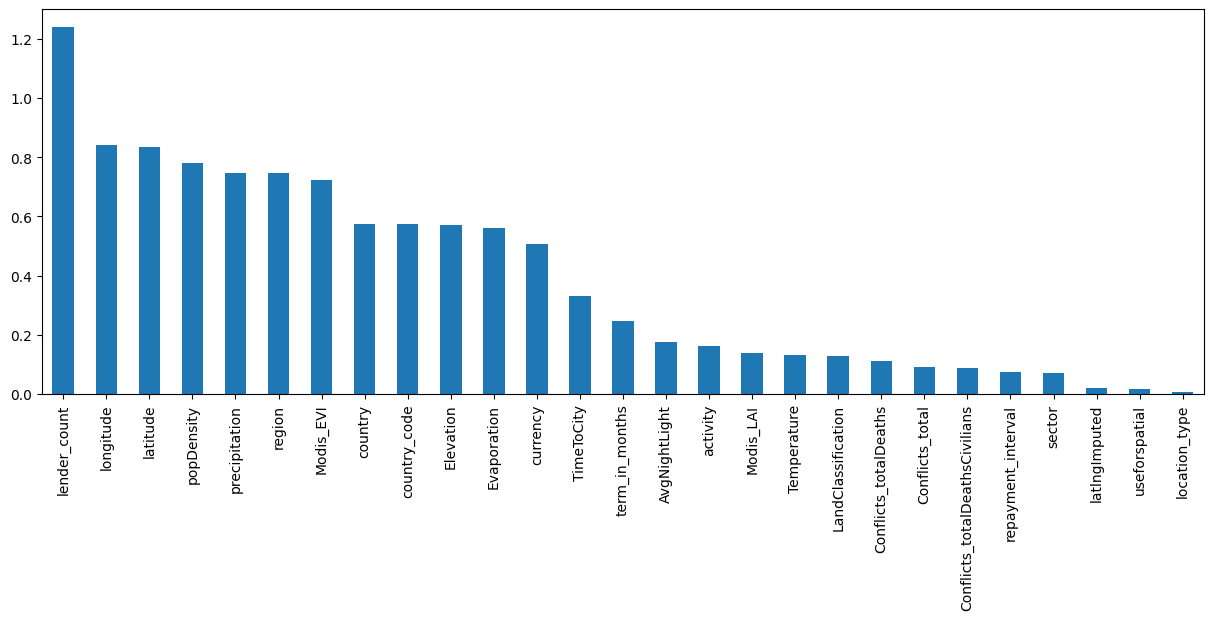

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5));

In [ ]:
from sklearn.feature_selection import SelectPercentile

selected_top_columns = SelectPercentile(mutual_info_regression, percentile=5)
selected_top_columns.fit(x, y)

SelectPercentile(percentile=5,
                 score_func=<function mutual_info_regression at 0x7896f271caf0>)

In [ ]:
selected_top_columns.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
features=x.columns[selected_top_columns.get_support()]
features

Index(['longitude', 'lender_count'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x1=x[features]

x_train, x_test,y_train,y_test = train_test_split(x1,y, test_size=0.3,random_state = 42)

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.6991652886610313
0.6956855710840526


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
pipe = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])
# fit pipeline
pipe.fit(x_train, y_train)
# make predictions
print(pipe.score(x_train, y_train))
pipe.score(x_test, y_test)

0.6991652886610313


0.6956855710840526

In [ ]:
from sklearn.linear_model import LinearRegression

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 42)

lr= LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7208935892271181
0.7177068447427375


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
x1=pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[4.14385133e-01 2.26233107e-01 1.76140449e-01 8.15418620e-02
 5.91415852e-02 2.11230081e-02 1.20605448e-02 8.85265700e-03
 3.80382376e-04 5.72329381e-05 2.92254345e-05 2.28850216e-05]


In [ ]:
lr= LinearRegression()
x_train, x_test,y_train,y_test = train_test_split(x1,y, test_size=0.3,random_state = 42)

lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7065081250381138
0.7028855566702852


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=  RandomForestRegressor(random_state=42)
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 42)

rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9691050880880173
0.8713923527037031


In [ ]:
x1=x[features]
x_train, x_test,y_train,y_test = train_test_split(x1,y, test_size=0.3,random_state = 42)
rf=  RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.8852472243550285
0.8273510499554348


In [ ]:
pca = PCA(n_components=10)
x1=pca.fit_transform(x)
rf=  RandomForestRegressor(random_state=42)
x_train, x_test,y_train,y_test = train_test_split(x1,y, test_size=0.3,random_state = 42)

rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

In [ ]:
x2=df[['longitude','latitude', 'lender_count','popDensity','precipitation','region']]
y=df['funded_amount']
rf=  RandomForestRegressor(random_state=42)
x_train, x_test,y_train,y_test = train_test_split(x2,y, test_size=0.3,random_state = 42)

rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.8924882573845726
0.8207636980144404


In [ ]:
import pickle
pickle.dump(rf, open('drive/MyDrive/rf_model.pkl', 'wb'))

In [ ]:
len(df.currency.unique())

67

In [ ]:
np.array(x_test.iloc[2,:]).reshape(-1,6).reshape(6,).shape

(6,)

In [ ]:
rf.predict([[3154,56,67,7,85,221]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([168.85719841])